<a href="https://colab.research.google.com/github/mertdonmez93/Odevler/blob/main/Project2_House_Prices_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prices Regression Project

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
font = {'family': 'arial',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")
warnings.filterwarnings('ignore')
font = {'family':'arial','color':'darkred','weight':'normal','size':14}

house_prices_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
house_prices_df.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 1. Data Cleaning

In [2]:
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
A = house_prices_df.isnull().sum()/len(house_prices_df)

houseprices_df = house_prices_df.interpolate(method ='linear', limit_direction ='forward')

B = (houseprices_df.isnull().sum()/len(houseprices_df))

print(A,B,B-A)

Id              0.000
MSSubClass      0.000
MSZoning        0.000
LotFrontage     0.177
LotArea         0.000
Street          0.000
Alley           0.938
LotShape        0.000
LandContour     0.000
Utilities       0.000
LotConfig       0.000
LandSlope       0.000
Neighborhood    0.000
Condition1      0.000
Condition2      0.000
BldgType        0.000
HouseStyle      0.000
OverallQual     0.000
OverallCond     0.000
YearBuilt       0.000
YearRemodAdd    0.000
RoofStyle       0.000
RoofMatl        0.000
Exterior1st     0.000
Exterior2nd     0.000
MasVnrType      0.005
MasVnrArea      0.005
ExterQual       0.000
ExterCond       0.000
Foundation      0.000
BsmtQual        0.025
BsmtCond        0.025
BsmtExposure    0.026
BsmtFinType1    0.025
BsmtFinSF1      0.000
BsmtFinType2    0.026
BsmtFinSF2      0.000
BsmtUnfSF       0.000
TotalBsmtSF     0.000
Heating         0.000
HeatingQC       0.000
CentralAir      0.000
Electrical      0.001
1stFlrSF        0.000
2ndFlrSF        0.000
LowQualFin

## 2. Data Discovery

In [4]:
#Returns size of dataframe/series which is equivalent to total number of elements. That is rows x columns.
print("Dataset size : ",houseprices_df.size)
#Returns tuple of shape (Rows, columns) of dataframe/series.
print("Shape of dataset  : ", houseprices_df.shape)
#Returns dimension of dataframe/series. 1 for one dimension (series), 2 for two dimension (dataframe).
print("Dimension of dataset  : ", houseprices_df.ndim) 
display(houseprices_df.describe().T)
# It finds: count,mean or average,standart deviation,min,25th percentiles,50th percentiles,75th percentiles,max values
#Age and Fare important to us.
##passengerId will be delated later because it doesn't effect our conclusion.

Dataset size :  118260
Shape of dataset  :  (1460, 81)
Dimension of dataset  :  2


,count,mean,std,min,25%,50%,75%,max
Id,1460.000,730.500,421.610,1.000,365.750,730.500,1095.250,1460.000
MSSubClass,1460.000,56.897,42.301,20.000,20.000,50.000,70.000,190.000
LotFrontage,1460.000,70.205,23.051,21.000,60.000,69.500,80.000,313.000
LotArea,1460.000,10516.828,9981.265,1300.000,7553.500,9478.500,11601.500,215245.000
OverallQual,1460.000,6.099,1.383,1.000,5.000,6.000,7.000,10.000
OverallCond,1460.000,5.575,1.113,1.000,5.000,5.000,6.000,9.000
YearBuilt,1460.000,1971.268,30.203,1872.000,1954.000,1973.000,2000.000,2010.000
YearRemodAdd,1460.000,1984.866,20.645,1950.000,1967.000,1994.000,2004.000,2010.000
MasVnrArea,1460.000,103.587,180.728,0.000,0.000,0.000,166.000,1600.000
BsmtFinSF1,1460.000,443.640,456.098,0.000,0.000,383.500,712.250,5644.000


findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


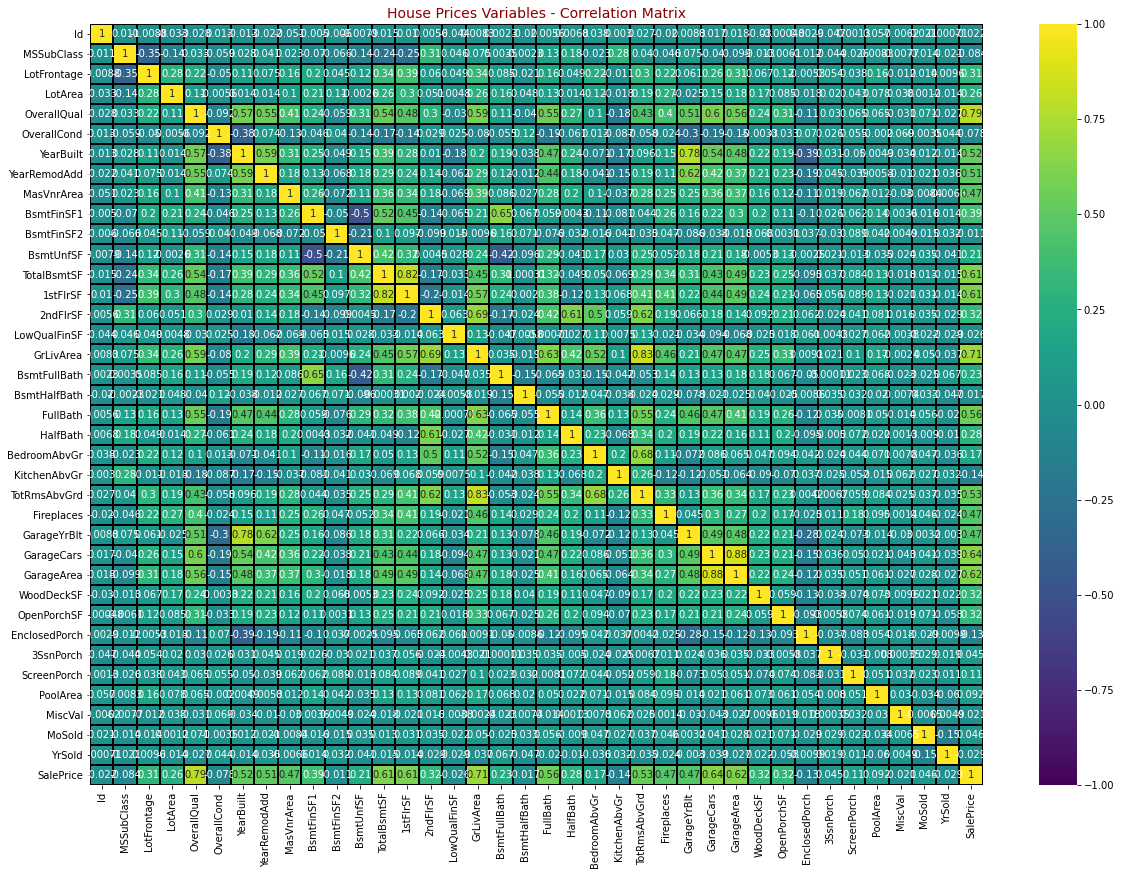

In [5]:
# Lets look at the heat map. If the correlation coefficient is If 0.8>, it is interpreted that there is a very high correlation.
houseprices_df_corr = houseprices_df.corr()
plt.figure(figsize=(20,14))
ax = sns.heatmap(houseprices_df_corr, annot = True, linewidths = 1, linecolor = "black",
            vmin = -1, vmax = 1, cmap = "viridis", mask=None)

plt.title("House Prices Variables - Correlation Matrix", fontdict = font)
plt.show()

Variable selection according to heatmap:
- **Target Variable:** SalePrice
- **Explanatory Variables:** OverallQual, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageCars, GarageArea

## 3. Create a Test Set

In [6]:
df_prices = houseprices_df.filter(['OverallQual','TotalBsmtSF','1stFlrSF','GrLivArea','GarageCars','GarageArea','YearBuilt','SalePrice'], axis=1)

In [7]:
# Y is the target variable
y1 = df_prices['SalePrice']
# X is the feature set
X1 = df_prices[['OverallQual','TotalBsmtSF','GrLivArea','GarageCars']]

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


## 4.Initial Regression Model

In [9]:
# We add constant to the model as it's a best practice
X_train = sm.add_constant(X_train)
# We fit an OLS model using statsmodels
results1 = sm.OLS(y_train, X_train).fit()
# We print the summary results
display(results1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     915.3
Date:                Fri, 14 May 2021   Prob (F-statistic):               0.00
Time:                        22:09:13   Log-Likelihood:                -13982.
No. Observations:                1168   AIC:                         2.797e+04
Df Residuals:                    1163   BIC:                         2.800e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.612e+04   5163.448    -18.615      0.000   -1.06e+05    -8.6e+04
OverallQual  2.364e+04   1198.900     19.718      0.000    2.13e+04     2.6e+04
TotalBsmtSF    26.1105      3.104      8.411      0.000      20.020      32.201
GrLivArea      44.5914      2.715     16.422      0.000      39.264      49.919
GarageCars   2.084e+04   1945.955     10.711      0.000     1.7e+04    2.47e+04
==============================================================================
Omnibus:                      363.000   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26967.059
Skew:                          -0.482   Prob(JB):                         0.00
Kurtosis:                      26.520   Cond. No.                     9.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**R-squared & Adjusted R-squared: Values between 70-90% is ideal. In the modal is 76% which is ok.**
    

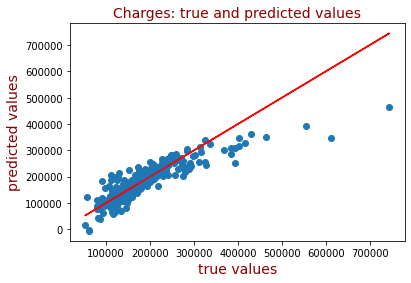

Mean absolute error of the prediction is: 27205.191789399527
Mean squared error of the prediction is: 1734589253.6143503
Root mean squared error of the prediction is: 41648.400372815646
Mean absolute percentage error of the prediction is: 16.21854556421729


In [10]:
# We add constant to the model as it's a best practice
# to do so everytime!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results1.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values", fontdict = font)
plt.ylabel("predicted values", fontdict = font)
plt.title("Charges: true and predicted values", fontdict = font)
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

### 4.1.Checking Linear Regression Assumptions

In [11]:
df_new = df_prices.copy()

# Y is the target variable
Y2 = df_new['SalePrice']
# X is the feature set
X2 = df_new[['OverallQual','TotalBsmtSF','GrLivArea','GarageCars']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X2, Y2)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [23572.23563223    32.52033744    45.64315247 18582.20858995]

Intercept: 
 -99248.85289101189


$$SalePrice = -99248.85+23572.23*OverallQual+32.52*TotalBsmtSF +45.64*GrLivArea +18582.20*GarageCars $$

#### 4.1.1. Assumption one: linearity of the model in the coefficients


Coefficients: 
 [23572.23    32.52    45.64 18582.2 ]

Intercept: 
 -99248.84999999998


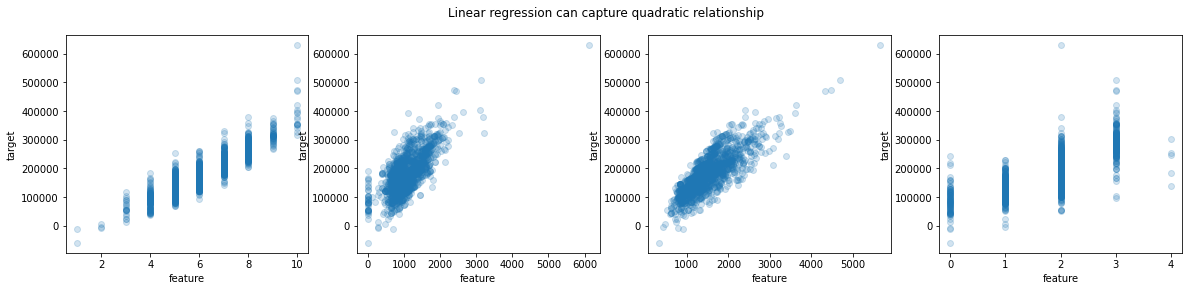

In [12]:
dfn = df_prices.copy()

dfn['Y'] = -99248.85+23572.23*dfn['OverallQual']+32.52*dfn['TotalBsmtSF']+45.64*dfn['GrLivArea']+18582.20*dfn['GarageCars']

lrm_example = linear_model.LinearRegression()
lrm_example.fit(dfn[['OverallQual','TotalBsmtSF','GrLivArea','GarageCars']],dfn["Y"])

# predictions of the linear regression
predictions = lrm_example.predict(dfn[['OverallQual','TotalBsmtSF','GrLivArea','GarageCars']])

# we print the estimated coefficients
print('\nCoefficients: \n', lrm_example.coef_)
print('\nIntercept: \n', lrm_example.intercept_)

X = dfn[['OverallQual','TotalBsmtSF','GrLivArea','GarageCars']]

# we plot the estimated Y and X
# the relationship should be quadratic
plt.figure(figsize=(20,4))

plt.suptitle('Linear regression can capture quadratic relationship')

plt.subplot(1,4,1)
plt.scatter(X['OverallQual'], predictions, alpha=0.2)
plt.xlabel("feature")
plt.ylabel("target")
plt.subplot(1,4,2)
plt.scatter(X['TotalBsmtSF'], predictions, alpha=0.2)
plt.xlabel("feature")
plt.ylabel("target")
plt.subplot(1,4,3)
plt.scatter(X['GrLivArea'], predictions, alpha=0.2)
plt.xlabel("feature")
plt.ylabel("target")
plt.subplot(1,4,4)
plt.scatter(X['GarageCars'], predictions, alpha=0.2)
plt.xlabel("feature")
plt.ylabel("target")

plt.show()

**4.1.2. Assumption two: the error term should be zero on average**

In [13]:
predictions = lrm.predict(X)
errors = Y2 - predictions

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: 3.968885372558685e-11


**4.1.3. Assumption three: homoscedasticity**

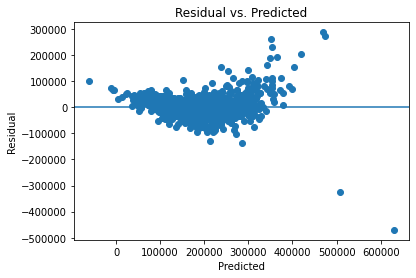

In [14]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [15]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 462.59 and p value is 1.31e-102
Levene test statistic value is 447.225 and p value is 1.79e-92


**4.1.4. Assumption four: low multicollinearity**

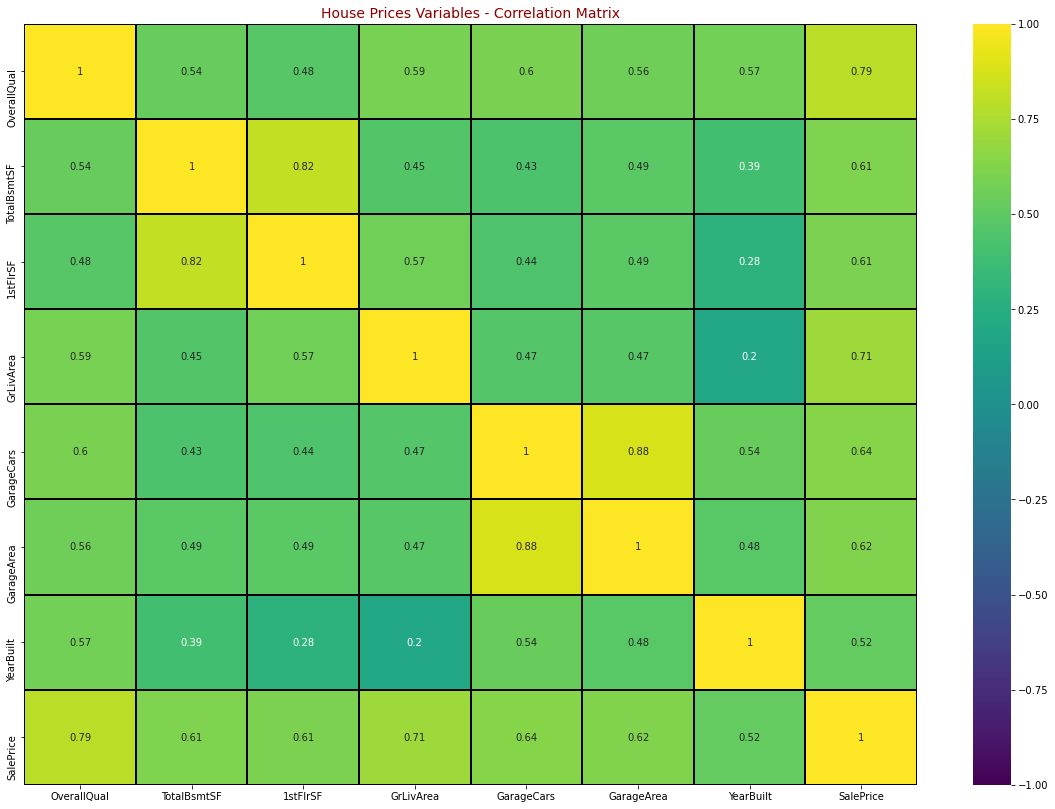

In [16]:
# Lets look at the heat map. If the correlation coefficient is If 0.8>, it is interpreted that there is a very high correlation.
df_new_corr = df_new.corr()
plt.figure(figsize=(20,14))
ax = sns.heatmap(df_new_corr, annot = True, linewidths = 1, linecolor = "black",
            vmin = -1, vmax = 1, cmap = "viridis", mask=None)

plt.title("House Prices Variables - Correlation Matrix", fontdict = font)
plt.show()

- Individual features are weakly correlated with one another, and ideally completely uncorrelated.

**4.1.5. Assumption five: error terms should be uncorrelated with one other**

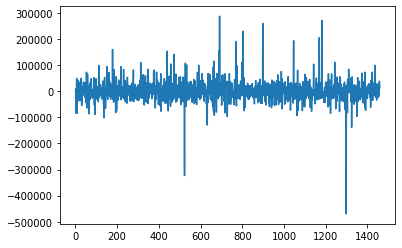

In [17]:
plt.plot(errors)
plt.show()

**4.1.6. Assumption six: features shouldn't be correlated with the errors**

In [18]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 36798.858148942854 and p value is 0.0
Normality test statistics is 421.6916504697729 and p value is 2.6966312816796317e-92


- The p-values of both tests indicate that our errors are not normally distributed.

## 5. Overfitting and Regularization

### 5.1 OLS Linear Regression

In [19]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

In [21]:
print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.7589275289356505
-----Test set statistics-----
R-squared of the model in test set is: 0.7605933139845169
Mean absolute error of the prediction is: 27205.191789399178
Mean squared error of the prediction is: 1734589253.6141741
Root mean squared error of the prediction is: 41648.40037281353
Mean absolute percentage error of the prediction is: 16.218545564217273


### 5.2 Ridge Regression

In [22]:
from sklearn.linear_model import Ridge

# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced.
ridgeregr = Ridge(alpha=20**1) 
ridgeregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print("R-squared of the model in training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.7588735452304577
-----Test set statistics-----
R-squared of the model in test set is: 0.7616115220522429
Mean absolute error of the prediction is: 27076.781518546024
Mean squared error of the prediction is: 1727211962.688779
Root mean squared error of the prediction is: 41559.7396850459
Mean absolute percentage error of the prediction is: 16.106477285760672


### 5.3. Lasso Regression

In [23]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=20**1) 
lassoregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model in training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.7589273571665371
-----Test set statistics-----
R-squared of the model in test set is: 0.7606550090372795
Mean absolute error of the prediction is: 27197.85559588962
Mean squared error of the prediction is: 1734142250.3274064
Root mean squared error of the prediction is: 41643.033635019994
Mean absolute percentage error of the prediction is: 16.212281412534015


### 5.4 ElasticNet Regression

In [24]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet(alpha=20**1, l1_ratio=0.5) 
elasticregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("R-squared of the model in training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.6210705379102499
-----Test set statistics-----
R-squared of the model in test set is: 0.692165887454011
Mean absolute error of the prediction is: 30215.37515640546
Mean squared error of the prediction is: 2230371057.7389455
Root mean squared error of the prediction is: 47226.80444132278
Mean absolute percentage error of the prediction is: 16.688328623359958


Comparation:

OLS:
- R-squared of the model in training set:0.75
- R-squared of the model in test set:0.76
- RMSE:41648.40
- MAPE:16.21

Ridge(for alpha = 20):
- R-squared of the model in training set:0.75
- R-squared of the model in test set:0.76
- RMSE:41559.73
- MAPE:16.10

Lasso(for alpha = 20):
- R-squared of the model in training set:0.75
- R-squared of the model in test set:0.76
- RMSE:41643.03
- MAPE:16.21

ElasticNet(for alpha = 20):
- R-squared of the model in training set:0.62
- R-squared of the model in test set:0.69
- RMSE:47226.80
- MAPE:16.68

### 5.5 XGBoost

In [25]:
pip install xgboost

In [28]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', seed=123)


In [29]:
xg_reg.fit(X_train,y_train)
y_predict = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print("RMSE: %f" % (rmse))

RMSE: 37196.917445


In [30]:
DM_train = xgb.DMatrix(data = X_train, label=y_train)
DM_test =  xgb.DMatrix(data = X_test, label=y_test)
params = {"booster":"gblinear", "objective":"reg:squarederror"}
xg_reg = xgb.train(dtrain=DM_train, params=params, num_boost_round=5)

In [31]:
y_predict_gblinear = xg_reg.predict(DM_test)
rmse = np.sqrt(mean_squared_error(y_test, y_predict_gblinear))
print("RMSE: %f" % (rmse))

RMSE: 64427.415817


In [37]:
house_prices_dmatrix = xgb.DMatrix(data=X1, label=y1)
params = {"objective":"reg:squarederror", "max_depth":4}
house_prices_cv = xgb.cv(dtrain=house_prices_dmatrix, params=params, nfold=4, 
                    num_boost_round=100, early_stopping_rounds = 5, metrics="rmse", as_pandas=True, seed=123)
display(house_prices_cv.sort_values(by='test-rmse-mean').head(5))

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
9,25379.735,64.899,38021.260,4396.420
8,26517.143,57.239,38427.759,4184.084
7,28375.125,128.315,39226.827,4208.981
6,31512.871,139.894,41090.852,3924.576
5,36576.678,158.514,44972.394,3970.588


In [40]:
house_prices_dmatrix = xgb.DMatrix(data=X1, label=y1)
params = {"objective":"reg:squarederror", "max_depth":4}
house_prices_cv = xgb.cv(dtrain=house_prices_dmatrix, params=params, nfold=4, 
                    num_boost_round=100, early_stopping_rounds = 5, metrics="mae", as_pandas=True, seed=123)
display(house_prices_cv.sort_values(by='test-mae-mean').head(5))

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
13,17071.451,188.126,22434.196,749.054
12,17260.313,205.657,22482.262,658.691
11,17479.919,201.966,22508.284,514.502
10,17789.040,218.648,22648.842,356.321
9,18269.281,212.280,22860.739,234.239


### 5.6 Light GBM

In [44]:
import lightgbm as lgb

In [45]:
d_train = lgb.Dataset(X_train, label=y_train)

In [46]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmsle',
    'max_depth': 6, 
    'learning_rate': 0.1,
    'force_row_wise':True,
    'verbose': -1}
n_estimators = 100

In [47]:
lgb_reg_model = lgb.train(params, d_train, num_boost_round = 100)
y_predict = lgb_reg_model.predict(X_test)
y_predict_train = lgb_reg_model.predict(X_train)

rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print("RMSE: %f" % (rmse))

RMSE: 37412.665820


# RMSE Comperation: LightGBM 37412.66 has given the best result.